In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pip install tensorflow

     |████████████████████████████████| 462 kB 6.1 MB/s 


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import stats 
from scipy.interpolate import make_interp_spline
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/one_hot_encoded_dataset.csv')
dataset.head()

,type,flight_month,num_of_stops,formatted_price,distance_bet_2_countries,airline_Air India,airline_Indigo,airline_Other_airline,airline_Vistara,source_Bangalore,...,week_day_of_flight_Thursday,week_day_of_flight_Tuesday,dep_time_Afternoon,dep_time_Early morning,dep_time_Evening,dep_time_Morning,arr_time_Afternoon,arr_time_Early morning,arr_time_Evening,arr_time_Morning
0,1,2,1,54306,0.984105,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,2,1,17829,0.755223,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,2,1,14150,0.451862,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,2,1,13258,0.258401,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
4,0,2,0,6363,0.653497,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [5]:
y_train = dataset['formatted_price'][:192167]
y_test = dataset['formatted_price'][192167:]

# dataset.drop(columns=['formatted_price','num_of_hours_taken','flight_day'],axis=1,inplace=True)
dataset.drop(columns=['formatted_price'],axis=1,inplace=True)

x_train = dataset[:192167]
x_test = dataset[192167:]

In [6]:
dataset.shape

(240197, 32)

In [7]:
# Build the neural network
model = model = tf.keras.Sequential([
                                     tf.keras.layers.Dense(units=128, input_dim=x_train.shape[1]),
                                     tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', loss='mean_squared_error')

start = time.process_time()
model.fit(x_train, y_train, epochs=10)
print(f'Time: {time.process_time() - start}')

model.evaluate(x_test, y_test)

# model = tf.keras.Sequential()
# model.add(Dense(8, input_dim=x_train.shape[1]))
# model.add(tf.keras.layers.Dense(8))
# model.add(tf.keras.layers.Dense(1))
# model.compile(optimizer='sgd', loss='mse',metrics=['accuracy'] )
# # This builds the model for the first time:
# model.fit(x_train,y_train, batch_size=32, epochs=10)

Epoch 1/10
6006/6006 [==============================] - 9s 1ms/step - loss: 575666944.0000
Epoch 2/10
6006/6006 [==============================] - 8s 1ms/step - loss: 315322368.0000
Epoch 3/10
6006/6006 [==============================] - 8s 1ms/step - loss: 179321424.0000
Epoch 4/10
6006/6006 [==============================] - 10s 2ms/step - loss: 82532720.0000
Epoch 5/10
6006/6006 [==============================] - 8s 1ms/step - loss: 51273584.0000
Epoch 6/10
6006/6006 [==============================] - 8s 1ms/step - loss: 49285788.0000
Epoch 7/10
6006/6006 [==============================] - 8s 1ms/step - loss: 49189820.0000
Epoch 8/10
6006/6006 [==============================] - 10s 2ms/step - loss: 49161612.0000
Epoch 9/10
6006/6006 [==============================] - 8s 1ms/step - loss: 49153760.0000
Epoch 10/10
6006/6006 [==============================] - 8s 1ms/step - loss: 49148808.0000
Time: 102.933488161
1501/1501 [==============================] - 2s 1ms/step - loss: 40597644.

40597644.0

In [8]:
# Predict
pred = model.predict(x_test)

# Measure MSE error.  
score = metrics.mean_squared_error(pred,y_test)

print(f'r2_score: {r2_score(y_test,pred)}')
print(f'MSE: {mean_squared_error(y_test, pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(f'MAE: {mean_absolute_error(y_test,pred)}')

r2_score: 0.9211330307152764
MSE: 40597679.99472394
RMSE: 6371.630874016788
MAE: 4239.720306391168


In [9]:
def compare_orgin_predict(y_test,y_pred,N=40):
  x_ax = range(len(y_test[:N]))
  plt.plot(x_ax, y_test[:N], label="original")
  plt.plot(x_ax, y_pred[:N], label="predicted")
  plt.title("Flight Price test and predicted data")
  plt.xlabel('Observation Number')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

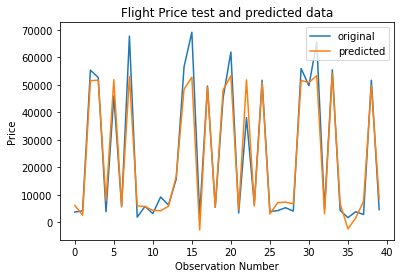

In [10]:
compare_orgin_predict(y_test,pred,N=40)